# Results

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
from src.evaluate import get_results_df
from src.misc import load_processed_dataset
%load_ext autoreload
%autoreload 2

Collect results

In [8]:
models = ["Linear", "ARIMA", "RandomForest", "CNN", "LSTM", "ConvLSTM"]
stocks = ["NVDA", "JPM", "HD", "UNH"]

dfs = []
for m in models:
    for s in stocks:
        dfs.append(get_results_df(f"{m}_{s}"))
dfs = pd.concat(dfs)
dfs.to_csv("./results.csv")

Loading Linear_NVDA.
Rank 1: trial no. 0, value: 45.0199203187251. Run completed at 2024-04-29 16:52:25.570862
Loading Linear_JPM.
Rank 1: trial no. 0, value: 46.613545816733065. Run completed at 2024-04-29 16:52:27.015066
Loading Linear_HD.
Rank 1: trial no. 0, value: 52.589641434262944. Run completed at 2024-04-29 16:52:28.379346
Loading Linear_UNH.
Rank 1: trial no. 0, value: 47.808764940239044. Run completed at 2024-04-29 16:52:29.689755
Loading ARIMA_NVDA.
Rank 1: trial no. 18, value: 56.97211155378486. Run completed at 2024-04-29 17:11:04.256046
Loading ARIMA_JPM.
Rank 1: trial no. 1, value: 52.98804780876494. Run completed at 2024-04-29 17:15:08.552541
Loading ARIMA_HD.
Rank 1: trial no. 4, value: 52.98804780876494. Run completed at 2024-04-29 17:27:20.232495
Loading ARIMA_UNH.
Rank 1: trial no. 1, value: 47.01195219123506. Run completed at 2024-04-29 17:35:18.839560
Loading RandomForest_NVDA.
Rank 1: trial no. 1, value: 50.59760956175299. Run completed at 2024-04-29 17:44:32.47

Load results if already exists

In [5]:
path = "./results.csv"
if os.path.exists(path):
    dfs = pd.read_csv(path, header=[0,1], index_col=0)
dfs["Model Type"] = dfs.index.str.split("_").str[0]
dfs["Stock"] = dfs.index.str.split("_").str[1]

Aggregating by stock

In [7]:
df = dfs.copy()
df.drop(columns=["Hyperparameters", "Model Type"]).groupby("Stock").mean().loc[["NVDA", "JPM", "HD", "UNH"]]

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_22281/248852036.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=["Hyperparameters", "Model Type"]).groupby("Stock").mean().loc[["NVDA", "JPM", "HD", "UNH"]]


Validation set                                                          \
                  R2        MSE       RMSE        MAE          p    Accuracy   
Stock                                                                          
NVDA     -0.24753428 0.00196531 0.04376697 0.03503818 0.03884602 49.53519256   
JPM      -0.26228733 0.00044194 0.02081327 0.01618928 0.02068996 48.80478088   
HD       -0.13828215 0.00044386 0.02092433 0.01598344 0.07250368 51.92563081   
UNH      -0.17845246 0.00027840 0.01650261 0.01281574 0.03330397 51.99203187   

                                                              Test set  \
      Avg. daily return Std. daily return Risk adj. return          R2   
Stock                                                                    
NVDA        -0.00210417        0.03325528      -0.06049100 -0.25203186   
JPM         -0.00034623        0.01426815      -0.02285721 -0.29839481   
HD          -0.00023387        0.01587887      -0.01208317 -0.16416481   
UNH          0.00002149        0.01246166      -0.00020706 -0.15088191   

                                                                \
             MSE       RMSE        MAE           p    Accuracy   
Stock                                                            
NVDA  0.00108453 0.03257765 0.02361088 -0.00395278 52.93333333   
JPM   0.00022075 0.01467125 0.01074293 -0.03470588 49.73333333   
HD    0.00021324 0.01449804 0.01078709  0.01850120 50.20000000   
UNH   0.00020444 0.01417508 0.00998843  0.03085183 51.20000000   

                                                            
      Avg. daily return Std. daily return Risk adj. return  
Stock                                                       
NVDA         0.00344616        0.02520458       0.13110339  
JPM          0.00054191        0.01030267       0.05189790  
HD           0.00023232        0.01007062       0.02157074  
UNH          0.00015475        0.00913768       0.01866290

Model Type,Linear,ARIMA,RandomForest,CNN,LSTM,ConvLSTM
Stock,,,,,,
NVDA,45.01992032,56.97211155,50.59760956,48.20717131,48.20717131,48.20717131
JPM,46.61354582,52.98804781,50.99601594,47.41035857,47.41035857,47.41035857
HD,52.58964143,52.98804781,54.18326693,54.58167331,48.60557769,48.60557769
UNH,47.80876494,47.01195219,50.99601594,55.77689243,57.76892430,52.58964143


Model Type,Linear,ARIMA,RandomForest,CNN,LSTM,ConvLSTM
Stock,,,,,,
NVDA,48.80000000,48.80000000,50.00000000,56.80000000,56.40000000,56.80000000
JPM,50.80000000,48.80000000,46.00000000,46.00000000,50.00000000,56.80000000
HD,46.40000000,46.80000000,53.20000000,47.60000000,53.60000000,53.60000000
UNH,50.40000000,50.80000000,52.00000000,50.40000000,50.80000000,52.80000000


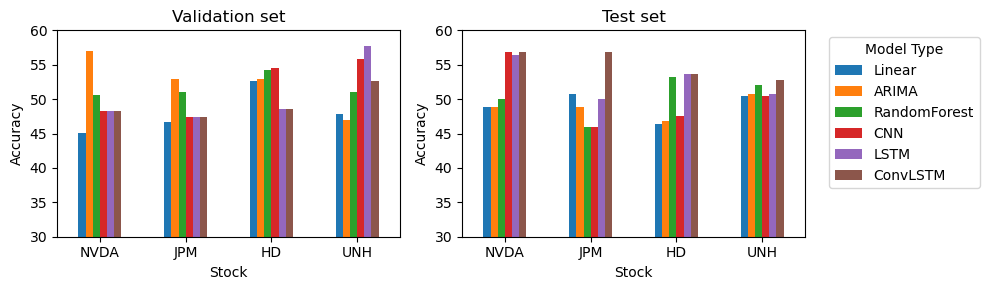

In [27]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

for i, set in enumerate(["Validation set", "Test set"]):
    df = dfs.copy()
    df = df.pivot(index='Stock', columns='Model Type', values=(set, "Accuracy"))
    df = df.loc[['NVDA', 'JPM', 'HD', 'UNH']] # Re-order rows
    df = df[['Linear', 'ARIMA', 'RandomForest','CNN', 'LSTM', 'ConvLSTM']] # Re-order columns
    display(df)
    df.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'{set}')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xlabel('Stock')
    axs[i].tick_params(labelrotation=0)
    axs[i].get_legend().remove()
    axs[i].set_ylim([30, 60]) 


axs[1].legend(title='Model Type', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.show()


First, we observe how each model performs on each stock. In terms of accuracy, there is no clear highest-performing model on the validation set. On the other hand, the test set shows the ConvLSTM model outperforming other model types on all stocks. 

In [16]:
# Aggregate by Model Type
df = dfs.copy()
df.drop(columns=["Hyperparameters", "Stock"]).groupby("Model Type").mean().loc[["Linear", "ARIMA", "RandomForest", "CNN", "LSTM", "ConvLSTM"]]

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_22281/445887624.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=["Hyperparameters", "Stock"]).groupby("Model Type").mean().loc[["Linear", "ARIMA", "RandomForest", "CNN", "LSTM", "ConvLSTM"]]


Validation set                                              \
                         R2        MSE       RMSE        MAE          p   
Model Type                                                                
Linear          -0.02066762 0.00065106 0.02361975 0.01858800 0.00687075   
ARIMA           -1.02644547 0.00135590 0.03361967 0.02663852 0.03078746   
RandomForest    -0.03631573 0.00068872 0.02402783 0.01888253 0.06086197   
CNN             -0.12797410 0.00068466 0.02448429 0.01912300 0.00949959   
LSTM            -0.00628597 0.00064480 0.02347886 0.01832636 0.07087916   
ConvLSTM        -0.02214544 0.00066911 0.02378037 0.01848158 0.06177991   

                                                                               \
                Accuracy Avg. daily return Std. daily return Risk adj. return   
Model Type                                                                      
Linear       48.00796813       -0.00087223        0.01850491      -0.03379087   
ARIMA        52.49003984       -0.00030584        0.01509480      -0.02210786   
RandomForest 51.69322709       -0.00010573        0.01629282       0.00525725   
CNN          51.49402390       -0.00092618        0.01982590      -0.03456280   
LSTM         50.49800797       -0.00063349        0.02131060      -0.01753170   
ConvLSTM     49.20318725       -0.00115072        0.02276692      -0.04072167   

                Test set                                               \
                      R2        MSE       RMSE        MAE           p   
Model Type                                                              
Linear       -0.01909141 0.00035809 0.01752181 0.01252915  0.02385229   
ARIMA        -1.01053333 0.00071815 0.02469201 0.01912823 -0.00055633   
RandomForest -0.10110938 0.00042627 0.01860393 0.01317114 -0.00732916   
CNN          -0.16178257 0.00038139 0.01834945 0.01319566 -0.04282749   
LSTM         -0.00462845 0.00035063 0.01737026 0.01233547  0.02478478   
ConvLSTM     -0.00106495 0.00034991 0.01734557 0.01233434  0.00839879   

                                                                               
                Accuracy Avg. daily return Std. daily return Risk adj. return  
Model Type                                                                     
Linear       49.10000000        0.00090831        0.01171694       0.05495246  
ARIMA        48.80000000        0.00058564        0.01129133       0.04494016  
RandomForest 50.30000000        0.00086942        0.01082230       0.07098626  
CNN          50.20000000        0.00119086        0.01503570       0.03647862  
LSTM         52.70000000        0.00125459        0.01608904       0.04510046  
ConvLSTM     55.00000000        0.00175389        0.01711801       0.08239443

Looking at the mean accuracies of each model for the test set, we observe that the hybrid ConvLSTM is improved across all metrics over its CNN and LSTM predecessors. The second-best model is the LSTM model, followed by the CNN and Random Forest models. The ConvLSTM model, relative to the other models performs much better. Now turning our attention to the standard deviation of daily return, we observe that the statistical models all similarly have lower variation than the deep learning models. This suggests the trading decisions derived from the deep learning models result in riskier portfolios, whose values vary more than those of the statistical models. However, this is counter-balanced by the average daily return being higher for the deep learning models. Consequently, all models have similar risk adjusted returns, except the ConvLSTM model which is notably higher. Similar rankings can be observed from the traditional machine learning metrics, with higher accuracy correlating to higher average daily return, but as noted in Section X, this is not always true.

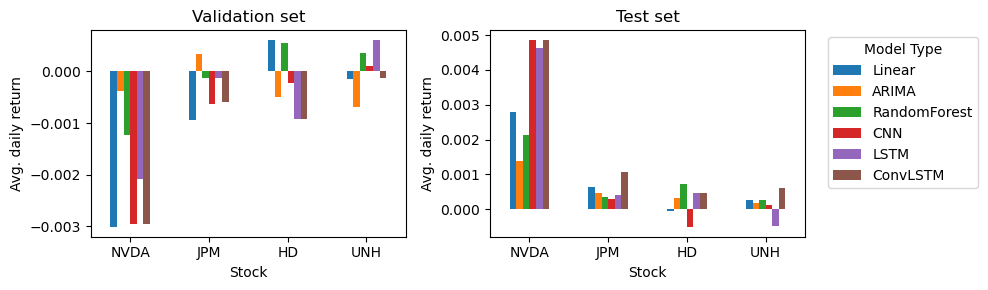

In [26]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

for i, set in enumerate(["Validation set", "Test set"]):
    df = dfs.copy()
    df = df.pivot(index='Stock', columns='Model Type', values=(set, "Avg. daily return"))
    df = df.loc[['NVDA', 'JPM', 'HD', 'UNH']] # Re-order rows
    df = df[['Linear', 'ARIMA', 'RandomForest','CNN', 'LSTM', 'ConvLSTM']] # Re-order columns
    df.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'{set}')
    axs[i].set_ylabel('Avg. daily return')
    axs[i].set_xlabel('Stock')
    axs[i].tick_params(labelrotation=0)
    axs[i].get_legend().remove()


axs[1].legend(title='Model Type', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.show()


Viewing the average daily return for each of the models across the selected stocks shows large variation in NVIDIA stock. This can be explained with the high volatility of the stock during the validation and test set periods (2023 and 2024, respectively), where many external factors and events influenced sharp jumps in price, as can be seen in Figure X.

In summary, comparing the models to each other, we conclude that ConvLSTM model is the best, whereas the linear regression and ARIMA models are the worst. Now we shift our attention to comparing the models to a baseline random walk model.

In [28]:
import seaborn as sns
from src.evaluate import random_walk
stocks = ["NVDA", "JPM", "HD", "UNH"]

random_df = []
for s in stocks:
    random_df.append(random_walk(s))
random_df = pd.concat(random_df)
random_df

,R2,MSE,RMSE,MAE,p,Accuracy,Avg. daily return,Std. daily return,Risk adj. return,Stock
0,-1.05775320,0.00178245,0.04221912,0.03158757,-0.01961993,50.00000000,0.00259022,0.02522597,0.10268063,NVDA
1,-1.08001233,0.00180174,0.04244685,0.03182528,0.00067114,49.60000000,0.00243437,0.02148658,0.11329744,NVDA
2,-0.95982756,0.00169763,0.04120230,0.03102806,0.06319344,53.60000000,0.00316054,0.01762301,0.17934184,NVDA
3,-0.93820740,0.00167890,0.04097440,0.03150312,0.02393293,48.40000000,0.00350995,0.02116178,0.16586284,NVDA
4,-0.85960718,0.00161082,0.04013499,0.03134208,0.12671680,53.20000000,0.00413856,0.02482279,0.16672422,NVDA
...,...,...,...,...,...,...,...,...,...,...
995,-1.87922097,0.00051145,0.02261517,0.01745124,-0.03715600,52.80000000,0.00010428,0.00993493,0.01049597,UNH
996,-1.87011769,0.00050983,0.02257939,0.01814187,0.14378865,55.20000000,0.00093807,0.00932627,0.10058320,UNH
997,-2.25343121,0.00057792,0.02403992,0.01892841,-0.03550563,50.40000000,0.00012910,0.00897467,0.01438475,UNH
998,-1.73058412,0.00048504,0.02202369,0.01778347,0.07138073,48.40000000,0.00031571,0.00986056,0.03201728,UNH


,R2,MSE,RMSE,MAE,p,Accuracy,Avg. daily return,Std. daily return,Risk adj. return,Stock
0,-1.05775320,0.00178245,0.04221912,0.03158757,-0.01961993,50.00000000,0.00259022,0.02522597,0.10268063,NVDA
1,-1.08001233,0.00180174,0.04244685,0.03182528,0.00067114,49.60000000,0.00243437,0.02148658,0.11329744,NVDA
2,-0.95982756,0.00169763,0.04120230,0.03102806,0.06319344,53.60000000,0.00316054,0.01762301,0.17934184,NVDA
3,-0.93820740,0.00167890,0.04097440,0.03150312,0.02393293,48.40000000,0.00350995,0.02116178,0.16586284,NVDA
4,-0.85960718,0.00161082,0.04013499,0.03134208,0.12671680,53.20000000,0.00413856,0.02482279,0.16672422,NVDA
...,...,...,...,...,...,...,...,...,...,...
995,-1.87922097,0.00051145,0.02261517,0.01745124,-0.03715600,52.80000000,0.00010428,0.00993493,0.01049597,UNH
996,-1.87011769,0.00050983,0.02257939,0.01814187,0.14378865,55.20000000,0.00093807,0.00932627,0.10058320,UNH
997,-2.25343121,0.00057792,0.02403992,0.01892841,-0.03550563,50.40000000,0.00012910,0.00897467,0.01438475,UNH
998,-1.73058412,0.00048504,0.02202369,0.01778347,0.07138073,48.40000000,0.00031571,0.00986056,0.03201728,UNH


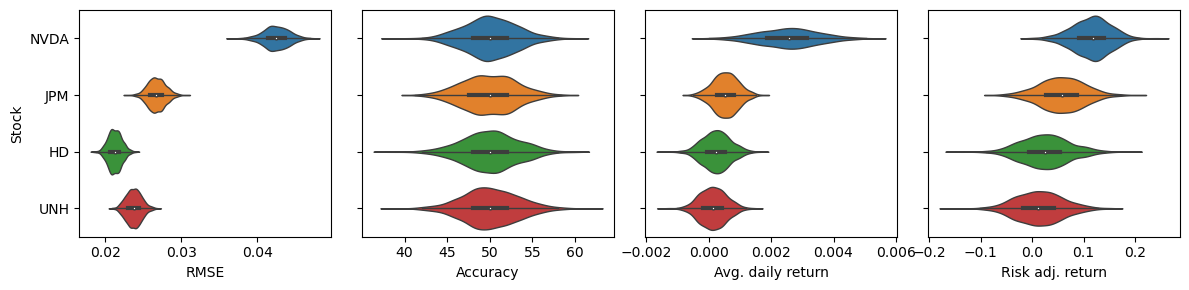

In [33]:
df = random_df
display(df)
fig, axs = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12,3))
sns.violinplot(data=df, x="RMSE", y="Stock", ax=axs[0], linewidth=1)
sns.violinplot(data=df, x="Accuracy", y="Stock", ax=axs[1], linewidth=1).set(ylabel=None) 
sns.violinplot(data=df, x="Avg. daily return", y="Stock", ax=axs[2], linewidth=1).set(ylabel=None) 
sns.violinplot(data=df, x="Risk adj. return", y="Stock", ax=axs[3], linewidth=1).set(ylabel=None)
fig.tight_layout()

In [34]:
random_df.groupby("Stock").mean()

,R2,MSE,RMSE,MAE,p,Accuracy,Avg. daily return,Std. daily return,Risk adj. return
Stock,,,,,,,,,
HD,-1.46025088,0.00045065,0.02120991,0.01665570,-0.00154551,50.02640000,0.00023891,0.00968711,0.02529536
JPM,-3.20422480,0.00071479,0.02671067,0.02112854,-0.00347414,49.91320000,0.00053071,0.00925316,0.05734307
NVDA,-1.08580890,0.00180676,0.04247356,0.03254093,0.00374187,50.04440000,0.00254700,0.02185612,0.11533465
UNH,-2.17078680,0.00056324,0.02371141,0.01861061,0.00136204,50.04960000,0.00013011,0.00954605,0.01351766


We can see the evaluation metric distributions of the random walk model across the selected stocks. Notably, the RMSE for a random walk model is much higher for NVIDIA, which reflects the high price volatility and unpredictability. However, this also meant a higher return during the test period of NVIDIA stock price. The accuracies have a mean of 50 may initially seem like a discrepancy as daily returns differ, but this is simply due to the compounding nature of stock returns. 

,R2,MSE,RMSE,MAE,p,Accuracy,Avg. daily return,Std. daily return,Risk adj. return
0,-1.95546575,0.00087338,0.02828586,0.02198506,0.03776665,50.20000000,0.00110122,0.01366336,0.07209553
1,-2.10949358,0.00090515,0.02895658,0.02238151,-0.02755672,50.20000000,0.00079224,0.01182458,0.04968050
2,-1.89863779,0.00084762,0.02801149,0.02169403,0.04287293,53.70000000,0.00127771,0.01142796,0.10029224
3,-1.99163340,0.00086011,0.02832100,0.02233371,-0.02568557,48.50000000,0.00093262,0.01240810,0.04620775
4,-1.95365457,0.00083973,0.02802742,0.02206717,0.03585953,52.00000000,0.00133348,0.01324890,0.07560883
...,...,...,...,...,...,...,...,...,...
995,-2.06676229,0.00091894,0.02894076,0.02224064,-0.03988918,49.10000000,0.00075601,0.01311611,0.03696599
996,-1.95490660,0.00091105,0.02877105,0.02234196,0.00612882,49.40000000,0.00087363,0.01305440,0.05726713
997,-2.08609802,0.00089164,0.02877677,0.02272362,0.01443309,49.70000000,0.00105711,0.01168628,0.07901336
998,-1.87897104,0.00088667,0.02838867,0.02225543,0.00235307,48.70000000,0.00079473,0.01331819,0.02982082


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

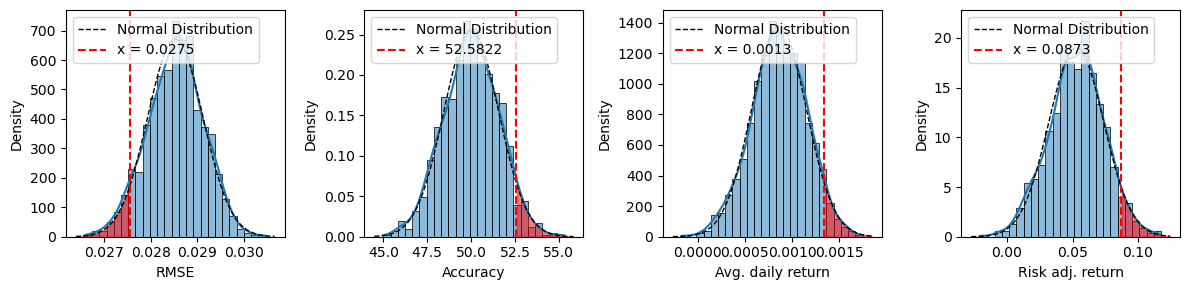

In [36]:
df = random_df.drop(columns=["Stock"]).groupby(random_df.index).mean()
display(df)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3))
for i, metric in enumerate(["RMSE", "Accuracy", "Avg. daily return", "Risk adj. return"]):
    sns.histplot(df, x=metric, kde=True, ax=axs[i], stat="density")
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)

    mean =  df[metric].mean()
    std =  df[metric].std()
    p = stats.norm.pdf(x, mean, std)
    axs[i].plot(x, p, "k", linewidth=1, label="Normal Distribution", linestyle="dashed")

    if metric == "RMSE":
        ci = stats.norm.ppf(0.05, mean, std)
        axs[i].fill_between(x, p, where=(x <= ci), color="red", alpha=0.5)
    else:
        ci = stats.norm.ppf(0.95, mean, std)
        axs[i].fill_between(x, p, where=(x >= ci), color="red", alpha=0.5)
    axs[i].axvline(ci, color="red", linestyle="--", label=f'x = {ci:.4f}')
    axs[i].legend(loc="upper left")

fig.tight_layout()

In [10]:
df = dfs.copy()
df.drop(columns=["Hyperparameters", "Stock"]).groupby("Model Type").mean().loc[["Linear", "ARIMA", "RandomForest", "CNN", "LSTM", "ConvLSTM"]]["Test set"]

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_58740/377110121.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=["Hyperparameters", "Stock"]).groupby("Model Type").mean().loc[["Linear", "ARIMA", "RandomForest", "CNN", "LSTM", "ConvLSTM"]]["Test set"]


,R2,MSE,RMSE,MAE,p,Accuracy,Avg. daily return,Std. daily return,Risk adj. return
Model Type,,,,,,,,,
Linear,-0.01909141,0.00035809,0.01752181,0.01252915,0.02385229,49.10000000,0.00090831,0.01171694,0.05495246
ARIMA,-1.01053333,0.00071815,0.02469201,0.01912823,-0.00055633,48.80000000,0.00058564,0.01129133,0.04494016
RandomForest,-0.10110938,0.00042627,0.01860393,0.01317114,-0.00732916,50.30000000,0.00086942,0.01082230,0.07098626
CNN,-0.16178257,0.00038139,0.01834945,0.01319566,-0.04282749,50.20000000,0.00119086,0.01503570,0.03647862
LSTM,-0.00462845,0.00035063,0.01737026,0.01233547,0.02478478,52.70000000,0.00125459,0.01608904,0.04510046
ConvLSTM,-0.00106495,0.00034991,0.01734557,0.01233434,0.00839879,55.00000000,0.00175389,0.01711801,0.08239443


Performing the statistical tests, we see that only the ConvLSTM model is statistically better than the random walk model in terms of RMSE, accuracy and average daily return. However, the ConvLSTM model does not fall in the critical region for risk adjusted return. This suggests that although the ConvLSTM is able to generate higher returns, it comes with more risk. No other models are statistically significant across average daily return, although the LSTM model also outperforms the random walk model in terms of accuracy. Finally, all models have an improved RMSE, which supports the use of financial metrics, demonstrating that a good RMSE does not always translate to good trading performance.

## Risk analysis

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_22281/2130644621.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=["Stock", "Hyperparameters"]).groupby("Model Type").mean()["Test set"]


,Avg. daily return,Std. daily return
Model Type,,
ARIMA,0.00058564,0.01129133
CNN,0.00119086,0.01503570
ConvLSTM,0.00175389,0.01711801
LSTM,0.00125459,0.01608904
Linear,0.00090831,0.01171694
RandomForest,0.00086942,0.01082230


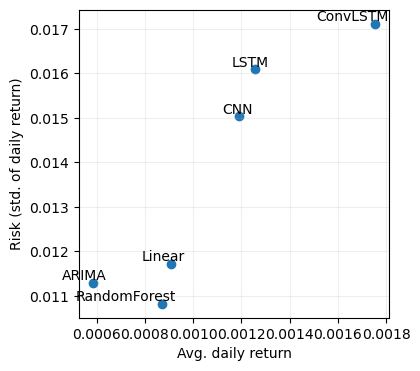

In [42]:
df = dfs.copy()
df = df.drop(columns=["Stock", "Hyperparameters"]).groupby("Model Type").mean()["Test set"]
display(df[["Avg. daily return", "Std. daily return"]])

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x=df["Avg. daily return"], y=df["Std. daily return"])
plt.xlabel('Avg. daily return')
plt.ylabel('Risk (std. of daily return)')
ax.grid(True, alpha=0.2)

for label, x, y in zip(df.index, df["Avg. daily return"], df["Std. daily return"]):
    plt.annotate(label, xy=(x, y), xytext=(10, 0), textcoords='offset points', ha='right', va='bottom')

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_22281/1779348945.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=["Model Type", "Hyperparameters"]).groupby("Stock").mean()["Test set"]


,Avg. daily return,Std. daily return
Stock,,
HD,0.00023232,0.01007062
JPM,0.00054191,0.01030267
NVDA,0.00344616,0.02520458
UNH,0.00015475,0.00913768


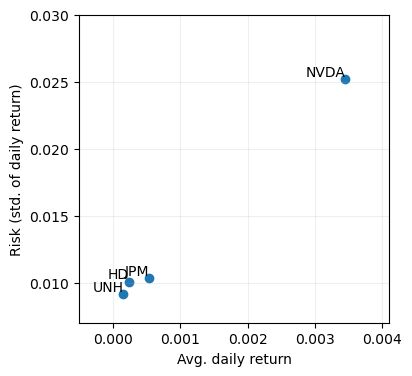

In [38]:
df = dfs.copy()
df = df.drop(columns=["Model Type", "Hyperparameters"]).groupby("Stock").mean()["Test set"]
display(df[["Avg. daily return", "Std. daily return"]])

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x=df["Avg. daily return"], y=df["Std. daily return"])
plt.xlabel('Avg. daily return')
plt.ylabel('Risk (std. of daily return)')
ax.grid(True, alpha=0.2)
ax.set_ylim((0.007,0.03))
ax.set_xlim((-0.0005,0.0041))

for label, x, y in zip(df.index, df["Avg. daily return"], df["Std. daily return"]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')